In [1]:
from sklearn.datasets import fetch_olivetti_faces
import math

In [2]:
dataset = fetch_olivetti_faces()
x_data= dataset.data
y_data= dataset.target

In [3]:
x_data.shape # 400 human ,4096
math.sqrt(4096) # 64 * 64

64.0

In [4]:
#dir(math) # show all the related methods

In [5]:
#print(y_data) #多少个人的头像

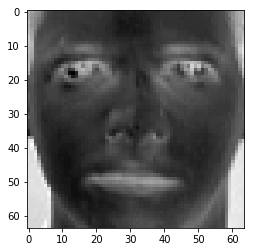

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import *

array_img = x_data[0]
m_img = array_img.reshape(64,64)
plt.imshow(m_img,cmap=cm.binary)
plt.show()


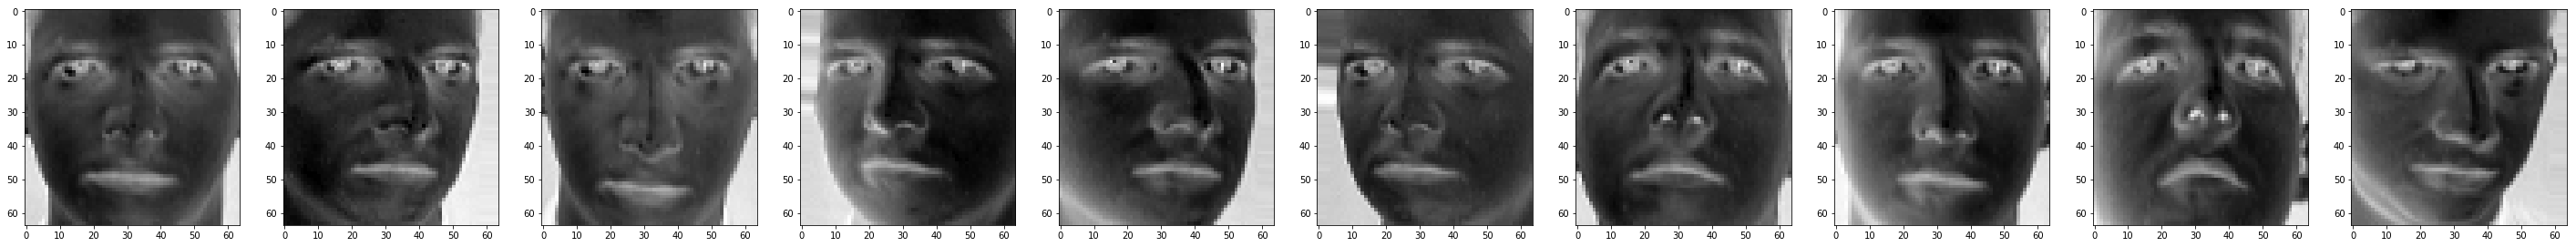

In [20]:
plt.figure(figsize=(50,10)) # 设置画布大小 让他横着显示
for j in range(10):
    sub1 = plt.subplot(1,10,j+1);
    array_img = x_data[j]
    m_img = array_img.reshape(64,64)
    sub1.imshow(m_img,cmap=cm.binary)

plt.show()
    

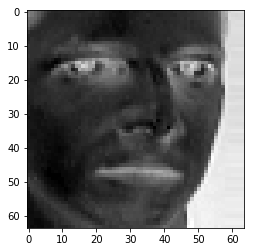

In [7]:
array_img = x_data[1]
m_img = array_img.reshape(64,64)
plt.imshow(m_img,cmap=cm.binary)
plt.show()

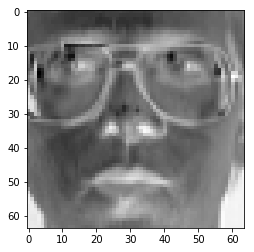

In [8]:
array_img = x_data[12]
m_img = array_img.reshape(64,64)
plt.imshow(m_img,cmap=cm.binary)
plt.show()

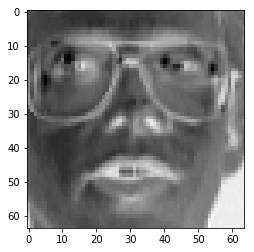

In [9]:
array_img = x_data[13]
m_img = array_img.reshape(64,64)
plt.imshow(m_img,cmap=cm.binary)
plt.show()

In [38]:
x_data_lib=[]
y_data_lib=[]

x_test=[]
y_test=[]

for i in range(400):
    if (i % 10 < 8):
        x_data_lib.append(x_data[i])
        y_data_lib.append(y_data[i])
    else:
        x_test.append(x_data[i])
        y_test.append(y_data[i])


In [27]:
import numpy as np
x_data_lib = np.array(x_data_lib)
y_data_lib = np.array(y_data_lib)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test)

[[ 0.24380165  0.29752067  0.36776859 ...,  0.19008264  0.18181819
   0.19008264]
 [ 0.38016528  0.44214877  0.48347107 ...,  0.17355372  0.17355372
   0.17355372]
 [ 0.68181819  0.70661157  0.71900827 ...,  0.11157025  0.10743801
   0.10330579]
 ..., 
 [ 0.14876033  0.20661157  0.19421488 ...,  0.35123968  0.35950413
   0.36776859]
 [ 0.21487603  0.21900827  0.21900827 ...,  0.57438016  0.59090906
   0.60330576]
 [ 0.5165289   0.46280992  0.28099173 ...,  0.35950413  0.35537189
   0.38429752]]


In [12]:
x_data_lib.shape

(320, 4096)

In [13]:
x_test.shape

(80, 4096)

In [14]:
#y_test[0].shape
x_test[0].shape

(4096,)

In [15]:
from sklearn.metrics.pairwise import paired_euclidean_distances
#找出距离最近的一个，但是这样不科学 因为最好是找出距离近的几个 然后看看他们各自在各个分类的多少 来算
def min_eul_dist_face(test_face):
    ylist = []
    minimumList = []
    miniIndex = 0
    
    for i in range(320):
        ylist.append(paired_euclidean_distances([test_face], [x_data_lib[i]]))
   
    miniValue = ylist[0]
    for y in range(len(ylist)):
        if (ylist[y] < miniValue):
            miniValue = ylist[y]
            miniIndex = y
    return y_data_lib[miniIndex]

#y_pred = min_eul_dist_face(x_test[0])

In [54]:
from sklearn.metrics.pairwise import paired_euclidean_distances
#找出距离最近的几个 然后统计一下他们各自在各个分类的数量 然后得出结论 这两 就比上面找出距离最小的一个 更加科学
def min_eul_dist_face_opt(test_face):

    distance_dict = {}
    
    for i in range(320):
        distance_dict[i] = paired_euclidean_distances([test_face], [x_data_lib[i]]);
    
    distance_list = sorted(distance_dict,key=distance_dict.get)
    
    result_dict = {}
    for i in distance_list[:10]:
        y = y_data_lib[i]
        if (y not in result_dict):
             result_dict[y] = 0
        result_dict[y] += 1
    
    result_list = sorted(result_dict, key=result_dict.get, reverse=True)
    
    return result_list[0];
        
y_pred = min_eul_dist_face_opt(x_test[6],10),y_test[6]
print(y_pred)

(3, 3)


In [31]:
#print(y_pred)y_pred = min_eul_dist_face(x_test[2])
y_pred = min_eul_dist_face(x_test[2])
print(y_pred,y_test[2])

1 1


In [30]:
# accurancy calculation
count = 0
for i in range(80):
    if(min_eul_dist_face(x_test[i]) != y_test[i]):
        count+=1

print(1- count/80)

0.8875
